In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Reading and transforming the file
cities = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

cracow = cities.loc[cities['City'] == 'Cracow', ['dt','AverageTemperature']]
cracow.columns = ['Date','Temp']
cracow['Date'] = pd.to_datetime(cracow['Date'])

#cracow.reset_index(drop=True, inplace=True)
cracow.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
#cracow20=cracow.loc['1993':'2013']
cracow = cracow.loc['1970':'2013-01-01']
cracow = cracow.asfreq('M', method='bfill')

<Axes: xlabel='Date'>

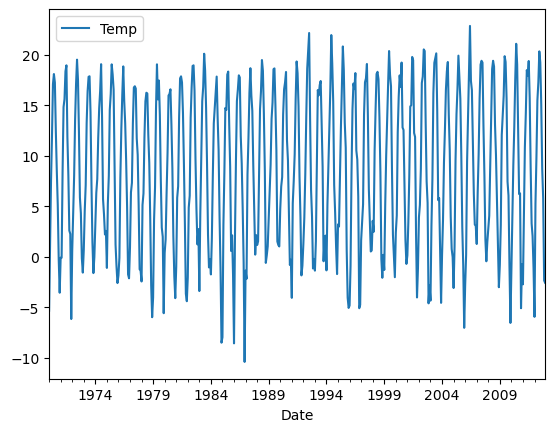

In [3]:
cracow.plot()

In [4]:
cracow['lag'] = cracow["Temp"].shift(-1) - cracow["Temp"]

In [5]:
cracow_yearly = cracow.groupby(cracow.index.year).mean()

<Axes: xlabel='Date'>

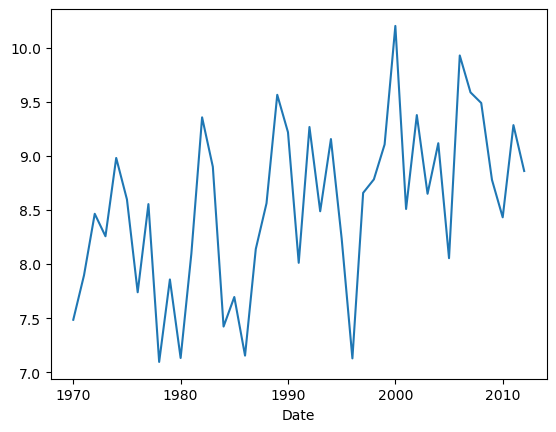

In [6]:
cracow_yearly["Temp"].plot()

<Axes: xlabel='Date'>

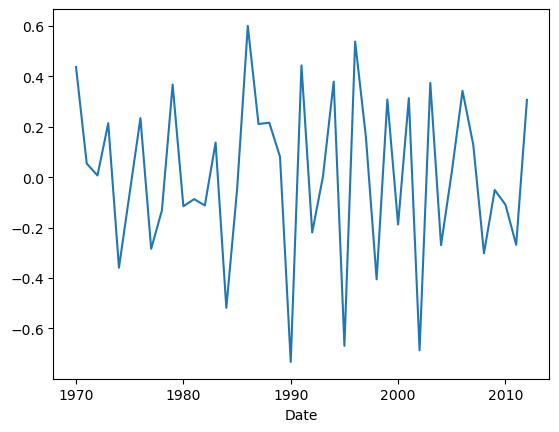

In [8]:
cracow_yearly["lag"].plot()

In [188]:
cracow_yearly['lag'] = cracow_yearly["Temp"].shift(1) - cracow_yearly["Temp"]

/home/grzesiek75/.conda/envs/mlenv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


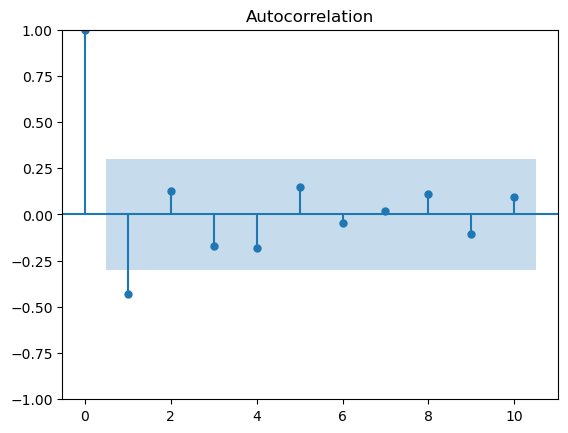

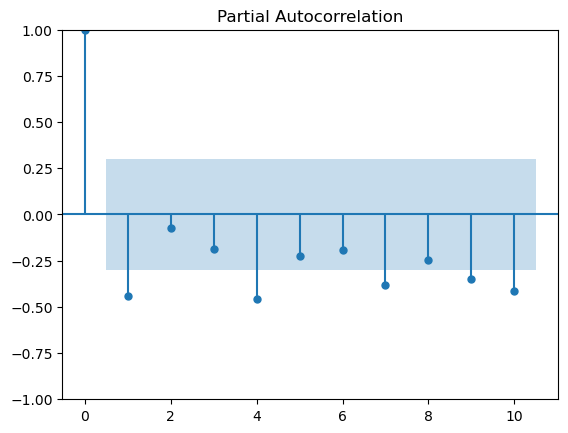

In [189]:
sm.graphics.tsa.plot_acf(cracow_yearly["lag"].dropna().values, lags=10, bartlett_confint=False)
sm.graphics.tsa.plot_pacf(cracow_yearly["lag"].dropna().values, lags=10)
plt.show()

In [190]:
from statsmodels.tsa.arima.model import ARIMA

In [191]:
model = ARIMA(cracow_yearly["Temp"], exog=None, order=(4, 1, 0))
model_fit = model.fit()
print(model_fit.summary());

/home/grzesiek75/.conda/envs/mlenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/grzesiek75/.conda/envs/mlenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/grzesiek75/.conda/envs/mlenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                   43
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 -46.067
Date:                Tue, 30 May 2023   AIC                            102.135
Time:                        19:21:29   BIC                            110.823
Sample:                             0   HQIC                           105.320
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5517      0.174     -3.170      0.002      -0.893      -0.211
ar.L2         -0.2151      0.162     -1.324      0.185      -0.534       0.103
ar.L3         -0.3720      0.212     -1.752      0.0

In [192]:
residuals = model_fit.resid.values

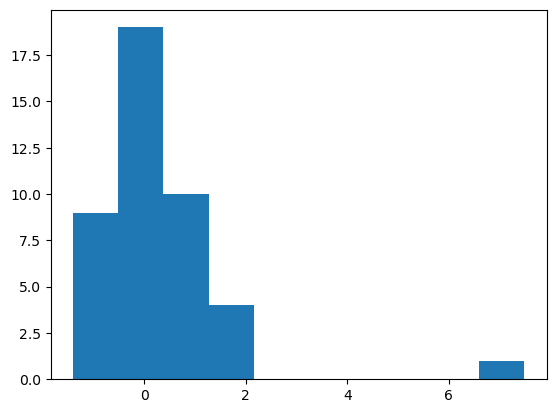

In [193]:
plt.hist(residuals);

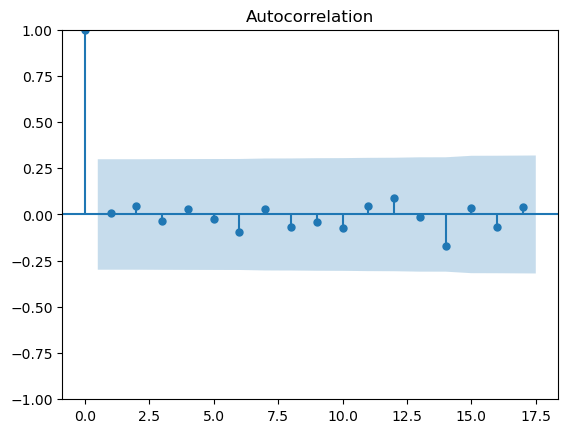

In [194]:
sm.graphics.tsa.plot_acf(residuals)
plt.show()

In [195]:
forecast = model_fit.forecast(10)

/home/grzesiek75/.conda/envs/mlenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [196]:
forecast.index = range(2012, 2022)

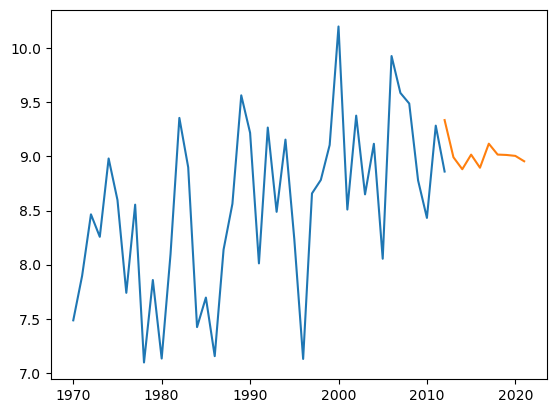

In [197]:
plt.plot(cracow_yearly.index, cracow_yearly.Temp)
plt.plot(forecast.index, forecast.values)